In [1]:
import tensorflow as tf
import os

C:\Users\Hemanth R\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
tf.config.list_physical_devices('GPU')

[]

In [4]:
import cv2
import imghdr

In [5]:
data_dir = 'data1' 

In [6]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [7]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [8]:
import numpy as np
from matplotlib import pyplot as plt

In [9]:
data = tf.keras.utils.image_dataset_from_directory('data1' , shuffle = True)

Found 427 files belonging to 2 classes.


In [10]:
data_iterator = data.as_numpy_iterator()

In [11]:
batch = data_iterator.next()

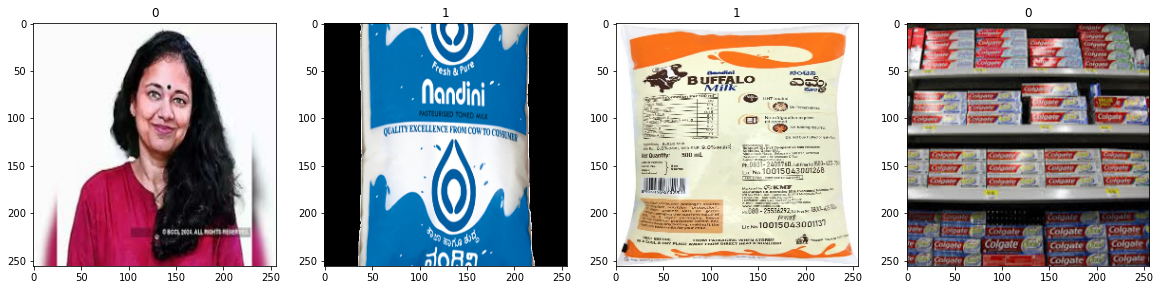

In [12]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [13]:
data = data.map(lambda x,y: (x/255, y))

In [14]:
data.as_numpy_iterator().next()

(array([[[[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         ...,
 
         [[1.        , 1.        , 1.        ],
          [1.     

In [15]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [16]:
train_size

9

In [17]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [18]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout , Rescaling

In [20]:
model1 = Sequential()

In [21]:
model1.add(Conv2D(16, (3,3),1 , activation='relu' , input_shape=(256,256,3)))
model1.add(MaxPooling2D())
model1.add(Conv2D(32, (3,3) ,1, activation='relu'))
model1.add(MaxPooling2D())
model1.add(Conv2D(16, (3,3),1, activation='relu'))
model1.add(MaxPooling2D())
model1.add(Flatten())
model1.add(Dense(256, activation ='relu'))
model1.add(Dense(1, activation = 'sigmoid'))

In [22]:
model1.compile('adam', loss=tf.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])

In [23]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [24]:
logdir='logs'

In [25]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [26]:
hist1 = model1.fit(train, epochs=10, validation_data=val , callbacks = [tensorboard_callback] )

Epoch 1/10


C:\Users\Hemanth R\anaconda3\lib\site-packages\keras\src\backend.py:5805: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


9/9 [==============================] - 16s 1s/step - loss: 1.1481 - accuracy: 0.5764 - val_loss: 0.5292 - val_accuracy: 0.7031
Epoch 2/10
9/9 [==============================] - 13s 1s/step - loss: 0.5209 - accuracy: 0.7326 - val_loss: 0.3305 - val_accuracy: 0.8906
Epoch 3/10
9/9 [==============================] - 13s 1s/step - loss: 0.3411 - accuracy: 0.8264 - val_loss: 0.2209 - val_accuracy: 0.9219
Epoch 4/10
9/9 [==============================] - 13s 1s/step - loss: 0.2536 - accuracy: 0.8889 - val_loss: 0.2255 - val_accuracy: 0.9062
Epoch 5/10
9/9 [==============================] - 13s 1s/step - loss: 0.1807 - accuracy: 0.9306 - val_loss: 0.1495 - val_accuracy: 0.9219
Epoch 6/10
9/9 [==============================] - 13s 1s/step - loss: 0.1628 - accuracy: 0.9410 - val_loss: 0.1528 - val_accuracy: 0.9531
Epoch 7/10
9/9 [==============================] - 13s 1s/step - loss: 0.1110 - accuracy: 0.9722 - val_loss: 0.1022 - val_accuracy: 0.9531
Epoch 8/10
9/9 [=============================

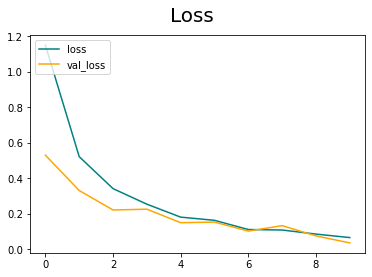

In [27]:
fig = plt.figure()
plt.plot(hist1.history['loss'], color='teal', label='loss')
plt.plot(hist1.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

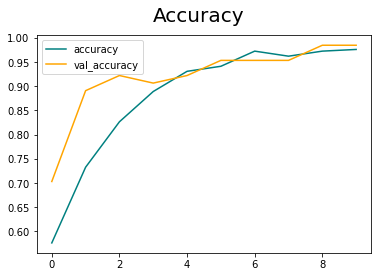

In [28]:
fig = plt.figure()
plt.plot(hist1.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist1.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [29]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [30]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [31]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model1.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 1s 544ms/step


In [32]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


In [33]:
import cv2

scanned
closing scanner


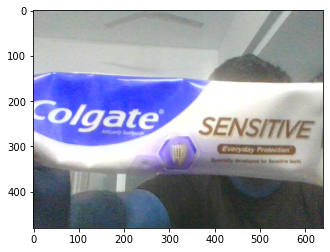

In [34]:
cam = cv2.VideoCapture(0)
cv2.namedWindow("Scanner ")
img_counter=0
while True:
    ret, frame = cam.read()
    
    if not ret:
        print("failed to scan")
        break
        
    cv2.imshow("test",frame)
    
    k=cv2.waitKey(1)
    
    if k%256==27:
        print("closing scanner")
        break
        
    elif k%256==32:
        img_name="image{}.png".format(img_counter)
        cv2.imwrite(img_name,frame)
        print("scanned")
        img_counter+=1
        

cam.release()
#cam.destroyAllWindows()
#img_list=[]
for i in range(img_counter):
    img = cv2.imread('image{}.png'.format(i))
#img_1 = cv2.cvtColor(img , cv2.COLOR_GRAY2RBG)
    plt.imshow(img)
    plt.show()

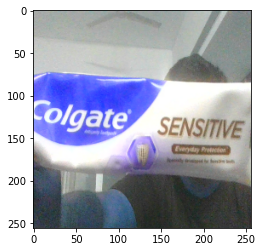

In [35]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [36]:
yhat = model1.predict(np.expand_dims(resize/255, 0))
if yhat > 0.5 :
    print("predicted class is milk")
else:
    print("predicted class is colgate")   
print(yhat)

1/1 [==============================] - 0s 64ms/step
predicted class is milk
[[0.96079403]]


In [37]:
model1.save('Image_classifier1.keras')